## Цель работы

Формирование представления об аддитивных цепочках, выработка умения составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, прививание навыка использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод

Бинарный метод - алгоритм вычисления степеней заданного числа, заключающийся в представлении степени $n$ в виде двоичного числа. Удвоение $n$ соответствует возведению текущего числа в квадрат, а увеличение $n$ на $1$ - умножению текущего числа на его начальное значение.

Поскольку при рассмотрении двоичного числа происходит сдвиг на цифру вправо каждый раз, можно считать, что возведение в квадрат производится всегда, но после этого, если цифра равна $1$, число дополнительно умножается само на себя. Первая единица не учитывается, поскольку соответствует умножению $x^0 * x^0 = 1*1 = 1$ и затем $1 * x = x$.

Пример:

Пусть $n=14 = 1110_2$. Не учитывая первую единицу, представим каждую цифру числа последовательностью операций $SM$, если это $1$, и операцией $S$, если это $0$, где $S = y*y$, $M = y*x$. Тогда

$14 \iff SMSMS$

$x*x = x^2$

$x^2 * x = x^3$

$x^3 * x^3 = x^6$

$x^6 * x = x^7$

$x^7 * x^7 = x^{14}$

### Метод множителей

Метод множителей - ещё один алгоритм для вычисления степеней, принцип действия которого основывается на замене переменной, возводимой в степень. Если степень $n$ - простое число, оно уменьшается на $1$, а исходное число $x$ выносится за выражение в качестве множителя. Так продолжается до тех пор, пока не найдётся такой показатель степени $m$, что $m \mid p \in P$. Тогда $x^p$ заменяется на условную переменную $y$, и вычисляется далее $y^{m/p}$. В некоторых случаях такой подход позволяет вычислять степени чисел быстрее, чем бинарный метод, особенно если искать делитель показателя степени вплоть до завершения расчётов, однако это происходит не всегда.

### Аддитивные цепочки

Аддитивной цепочкой для $n \in \mathbb{N}$ называется последовательность натуральных чисел $1=a_0, a_1, \ldots, a_m = n$, таких, что

$a_i = a_j + a_k,\ k \le j < i\ \ \forall i = 1 \ldots m$

Действие $a_i = a_j + a_k$ называется шагом аддитивной цепочки.

Наименьшая длина аддитивной цепочки для $n$:

$l(n) = m$

Экспериментально обнаружено, что для $n \le 1000$

$l(n) = min\{l(n-1) + 1, l_n\} + \delta_n$

\begin{equation*}
l_p = 
 \begin{cases}
   \infty, если\ p - простое\\
   l(q) + l({p \over q}),\ если\ q - минимальный\ простой\ длитель\ p
 \end{cases}
\end{equation*}

\begin{equation*}
\delta_n = 
 \begin{cases}
   0\\
   1,\ соответственно
 \end{cases}
\end{equation*}

Виды шагов:

1) удвоение: $j = k = i - 1$, следующее число: $a_i = 2a_{i-1}$

2) звёздный шаг: $j = i - 1,\ k \in [0, i-1]$, $a_i = a_{i-1} + a_k$

3) малый шаг: $\lambda(a_i) = \lambda(a_{i-1})$

\
Звёздная цепочка - аддитивная цепочка, состоящая только из звёздных шагов.

$l*(n) \ge l(n)$

Число слагаемых в АЦ: $C_i^2$

Число слагаемых в ЗЦ: $i$

### Алгоритм Брауэра

Алгоритм Брауэра позволяет построить аддитивную цепочку для заданного числа $n \in \mathbb{N}$ с учётом параметра $k \ge 2,\ k \in \mathbb{N}$, заданную следующим образом:

\begin{equation*}
B_k(n) = 
 \begin{cases}
   1, 2, 3, \ldots, 2^k - 1,\ если\ n < 2^k\\
   B_k(q), 2q, 4q, 8q, \ldots, 2^kq, n,\ если\ n \ge 2^k\ и\ q = \lfloor{n\over{2k}}\rfloor
 \end{cases}
\end{equation*}

$n = \sum\limits_{i=0}^j{c_i*2^{ik}},\ c_j \ne 0$

Длина цепочки Брауэра:

$l_B(n) = j(k+1) + 2^k - 2$ при $jk \le \log_2n < (j+1)k$

### Алгоритм дробления вектора индексов

Пусть $\exists$ ЗЦ длины $m-1$ вида $\{a_i\}_1^m, a_1=1$

Тогда вектором индексов звёздной цепочки называется набор чисел $\{r_i \in \mathbb{N}\}_{i=1}^{m-1}$ : $r_i = \{x:1 \le x \le iy\ \Rightarrow\ a_i = a_{i-1} + a_{r_{i-1}},\ 2 \le i \le m-1\}$

Суть алгоритма дробления ВИ заключается в следующем: вычисляется диапазон, в котором может лежать значение длины звёздной цепочки $m$: $\underline l(n) \le m \le \bar l(n)$. Затем перебираются значения в этом диапазоне, для каждого $m$ фиксируется значение $q = [m/2]$, и набор $\{r_i\}_{i=1}^q$ называется фиксированной частью вектора. Далее вычисляются значения $a_{max}$ и $a_{min}$ - последние числа соответствующих ЗЦ:

$\{r_i\}_{i=1}^q \cup \{q+1, q+2, \ldots, m\}$ - ВИ максимальной цепочки

$\{r_i\}_{i=1}^q \cup \{1, 1, \ldots, 1\}$ - ВИ минимальной цепочки, в котором в подвижной части вектора $m-q$ единиц.

Если не выполняется условие $a_{min} \le n \le a_{max}$, фиксированная часть вектора понижается, а значения вычисляются заново.

Когда же $n$ попадает в указанный промежуток, то перебирается подвижная часть ВИ, и тогда находится ЗЦ минимальной длины для числа $n$.

### Следствие 1 теоремы Брауэра

Согласно следствию 1 теоремы Брауэра при $k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))$ справедливо

$lim_{n\to \infty}\frac{l(n)}{\lambda(n)} =1$

### Гипотеза Шольца-Брауэра

Гипотеза Шольца-Брауэра иммеет следующее выражение:

$l^*(2^n-1) \le l^*(n) + n - 1$


## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

1. Реализация и проверка методов вычисления степеней

2. Реализация алгоритма Брауэра, тестирование при различных параметрах

3. Реализация алоритма дробления ВИ, тестирование

4. Проверка следствя 1 теоремы Брауэра для $1 \le n \le 200$, построение аппроксимирующей кривой

5. Проверка гипотезы Шольца-Брауэра для $2 \le n \le 10$

## Выполнение работы

In [1]:
bold = "\033[1m"
darkCyan = "\033[36m"
end = "\033[0m"

x = 2
divideTests = [517, 702, 634]
kArr = [1, 2, 3, 4]
powArr = [33, 62, 184]
broArr = [2289, 793, 1719]

### Бинарный метод

In [2]:
def binMeth(x, n):
    ops = 0
    result = x
    mylist = bin(n)[3::]
    for i in mylist:
        ops += 1
        result *= result
        if int(i) == 1:
            ops += 1
            result *= x
    return result, ops

### Метод множителей

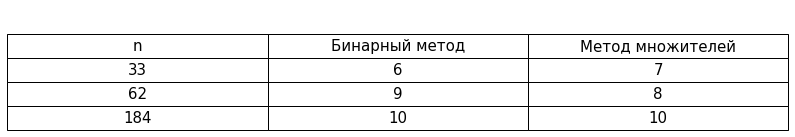

In [27]:
import matplotlib.pyplot as ppt

def leastPrime(n):
    if n == 2:
        return 2
    div = 2
    while div <= sqrt(n):
        if(not n%div):
            return div
        div += 1
    return 1

def multiMeth(x, n):
    ops = 0
    result = 1
    while n > 1:
        ldiv = leastPrime(n)
        if ldiv == 1:
            ops += 1
            result *= x
            n -= 1
        else:
            subRes = binMeth(x, ldiv)
            ops += subRes[1]
            x = subRes[0]
            n /= ldiv
    return (result * x), ops

fig, ax = ppt.subplots()
ax.set_axis_off()
fig.set_figheight(0.5)
fig.set_figwidth(7.0)
colText = []
for i in powArr:
    res1 = binMeth(x, i)
    res2 = multiMeth(x, i)
    colText.append([i, res1[1], res2[1]])
table = ppt.table(colText, colLabels = ["n", "Бинарный метод", "Метод множителей"], cellLoc = "center", edges = "closed")
table.scale(2,2)
table.set_fontsize(15)
ppt.show()

В таблице отражены результаты подсчёта количества операций, необходимых для возведения числа в $n$-ю степень. Как видно из таблицы, это количество у бинарного метода и у метода множителей в некоторых случаях различается. Несмотря на то, что метод множителей предполагает более эффективное и быстрое вычисление, иногда он всё же менее эффективен, чем бинарный метод. Однако чаще всего метод множителей выполняет количество операций, меньшее или равное оному у бинарного метода.

### Алгоритм Брауэра

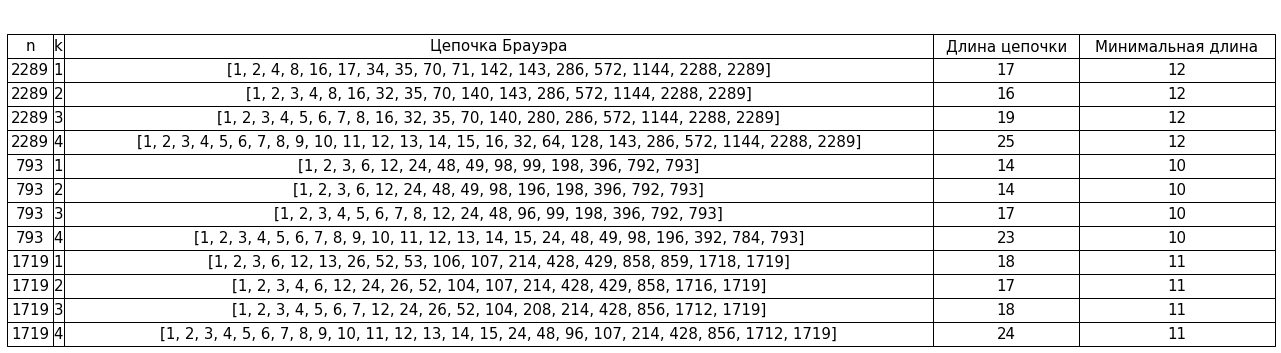

In [4]:
def la(n):
    return int(math.log(n, 2)) + 1

def brouwerMeth(chain, n, k):
    d = 2**k
    q = int(n/d)
    r = n%d
    if(n >= d):
        brouwerMeth(chain, q, k)
    else:
        for i in range(1, d):
            chain.append(i)
        return
    for i in range(1, k+1):
        if (2**i)*q not in chain:
            chain.append((2**i)*q)
    if (2**k)*q + r not in chain:
        chain.append((2**k)*q + r)

fig, ax = ppt.subplots()
ax.set_axis_off()
fig.set_figheight(0.5)
fig.set_figwidth(7.0)
colText = []
for n in broArr:
    for k in kArr:
        minL = la(n)
        chain = []
        brouwerMeth(chain, n, k)
        colText.append([n, k, chain, len(chain), minL])

table = ppt.table(colText, colLabels = ["n", "k", "Цепочка Брауэра", "Длина цепочки", "Минимальная длина"],\
                  cellLoc = "center", edges = "closed")
table.scale(3,2)
table.set_fontsize(15)
table.auto_set_column_width([0,1,2,3,4])
ppt.show()

Результаты тестирования показывают, что при удачном выборе параметра $k$ (для полученных данных $k=2$ )  $l_{Br}(n,k)$ принимает наиболее близкое к $\underline l(n)$ значение.

Алгоритм Брауэра работает достаточно быстро, а результаты его работы удовлетворительны - можно использовать его для быстрых расчётов аддитивных цепочек.

### Алгоритм дробления вектора индексов

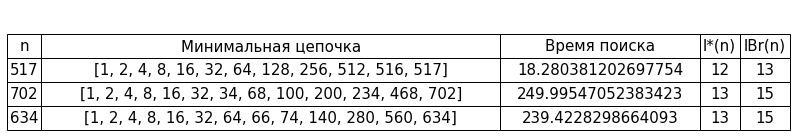

In [5]:
import time

def buildChain(indVec):
    starCh = [1]
    for i in indVec:
        starCh.append(starCh[-1] + starCh[i[-1]])
    return starCh


def nu(n):
    nStr = bin(n)[2::]
    return int(math.log(n, 2)) + nStr.count('1')


def divide(n):
    chain = []
    for m in range(la(n), nu(n) + 1):
        q = m // 2
        indVec = [[j for j in range(i+1)] for i in range(m-1)]
        if n > buildChain(indVec)[-1]:
            continue
        while True:
            indVec = indVec[:q:] + [[j for j in range(i + 1)] for i in range(q, m - 1)]
            maxChain = buildChain(indVec)
            minChain = buildChain(indVec[:q:] + [[0]] * (m - q - 1))
            if n == maxChain[-1]:
                return maxChain
            elif n == minChain[-1]:
                return minChain
            p = m - 2
            while True:
                while indVec[p][-1] == 0:
                    indVec[p] = indVec[p][-1::] + indVec[p][:-1:]
                    p -= 1
                    if p < q:
                        break
                if p < q:
                    break
                indVec[p] = indVec[p][-1::] + indVec[p][:-1:]
                p = m - 2
                chain = buildChain(indVec)
                if chain[-1] == n:
                    return chain
            subQ = q - 1
            while indVec[subQ][-1] == 0:
                indVec[subQ] = indVec[subQ][-1::] + indVec[subQ][:-1:]
                subQ -= 1
            if subQ < 0:
                break
            indVec[subQ] = indVec[subQ][-1::] + indVec[subQ][:-1:]
    return chain

fig, ax = ppt.subplots()
ax.set_axis_off()
fig.set_figheight(0.5)
fig.set_figwidth(7.0)
colText = []
for i in divideTests:
    begin = time.time()
    chainDiv = divide(i)
    overall = time.time() - begin
    chainBro = []
    brouwerMeth(chainBro, i, 2)
    colText.append([i, chainDiv, overall, len(chainDiv), len(chainBro)])
table = ppt.table(colText, colLabels = ["n", "Минимальная цепочка", "Время поиска", "l*(n)", "lBr(n)"],\
                  cellLoc = "center", edges = "closed")
table.scale(3,2)
table.set_fontsize(15)
table.auto_set_column_width([0,1,2,3,4])
ppt.show()

Из полученных результатов можно сделать вывод, что алгоритм дробления векторов, в отличие от алгоритма Брауэра, находит минимальную аддитивную цепочку для данного числа, но уступает последнему во времени выполнения, поскольку для перебора всевозможных фиксированных и нефиксированных частей вектора индексов требуется выполнить количество операций порядка $\sum\limits_{i = 1}^{l}q_i!*(m_i-q_i)!$, где $l$ - количество перебранных длин цепочки, $m_i$ - количество элементов в векторе индексов для текущей длины, $q_i$ - количество элементов в фиксированной части вектора. Операций может быть меньше, если для текущей комбинации, не являющейся самым младшим вектором, найдена цепочка для $n$.

### Проверка следствия 1 теоремы Брауэра

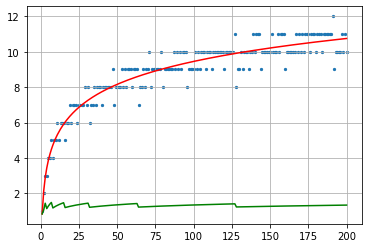

In [6]:
import numpy

def draw(N):
    x = numpy.array(range(1, N + 1))
    res = [(len(divide(v))) for v in x]
    y = numpy.array(res)
    
    # Метод наименьших квадратов
    s1 = sum(res)
    s2 = sum([math.log(i+1, 2) for i in range(N)])
    s3 = sum([res[i]*math.log(i+1, 2) for i in range(N)])
    s4 = sum([(math.log(i+1, 2))**2 for i in range(N)])
    a = (N*s3 - s1*s2)/(N*s4 - s2**2)
    b = (s1 - a*s2)/N
    
    f = numpy.array([(a*math.log(i+1, 2) + b) for i in range(N)])
    lim_f_y = [f[i]/(int(math.log(i+1, 2)) + 1) for i in range(N)]
    
    ppt.scatter(x, y, s=5)
    ppt.plot(x, f, label = "appr", color = "red")
    ppt.plot(x, lim_f_y, color = "green")
    ppt.grid(True)
    ppt.show()

draw(200)

Из графика видно, что длина звёздной аддитивной цепочки действительно имеет логарифмическую зависимость от исходного числа. При этом, если не меняется значение функции $\lambda(n)$, то график отношения $\frac{l(n)}{\lambda(n)}$ растёт по оси $y$, но когда увеличивается $\lambda(x)$, график немного снижается (так как $\lambda(n)$ - целое число). Таким образом, поскольку длина цепочки аппроксимируется логарифмом, с ростом $n$ будет наблюдаться всё меньший рост $l(n)$, тогда
$lim_{n\to\infty}\frac{l(n)}{\lambda(n)} = 1$

### Проверка гипотезы Шольца-Брауэра

In [24]:
print("Проверка гипотезы Шольца-Брауэра для n от 2 до 10:")
for elem in range(2, 11):
    begin = time.time()
    d1 = divide(2**elem - 1)
    overall = time.time() - begin
    d2 = divide(elem)
    print("l*(2^", elem, " - 1) = ", (bold + darkCyan + str(len(d1)) + end), " <= ", (bold + darkCyan + str(len(d2) + elem - 1) + end), " = l*(", elem, ") + ", elem, " - 1.", sep = "")
    print("Время вычисления 2^", elem, " - 1: ", overall, sep = "")

Проверка гипотезы Шольца-Брауэра для n от 2 до 10:
l*(2^2 - 1) = 3 <= 3 = l*(2) + 2 - 1.
Время вычисления 2^2 - 1: 5.817413330078125e-05
l*(2^3 - 1) = 5 <= 5 = l*(3) + 3 - 1.
Время вычисления 2^3 - 1: 0.0001518726348876953
l*(2^4 - 1) = 6 <= 6 = l*(4) + 4 - 1.
Время вычисления 2^4 - 1: 0.0004093647003173828
l*(2^5 - 1) = 8 <= 8 = l*(5) + 5 - 1.
Время вычисления 2^5 - 1: 0.005431652069091797
l*(2^6 - 1) = 9 <= 9 = l*(6) + 6 - 1.
Время вычисления 2^6 - 1: 0.02865457534790039
l*(2^7 - 1) = 11 <= 11 = l*(7) + 7 - 1.
Время вычисления 2^7 - 1: 2.026416063308716
l*(2^8 - 1) = 11 <= 11 = l*(8) + 8 - 1.
Время вычисления 2^8 - 1: 2.5037992000579834
l*(2^9 - 1) = 13 <= 13 = l*(9) + 9 - 1.
Время вычисления 2^9 - 1: 236.85990571975708
l*(2^10 - 1) = 14 <= 14 = l*(10) + 10 - 1.
Время вычисления 2^10 - 1: 2988.1451930999756


Гипотеза Шольца-Брауэра верна для $1 < n\le10$, что позволяет за меньшее время вычислять длины аддитивных цепочек для небольших значений $n$ и с помощью этого оптимизировать алгоритм дробления векторов индексов (например, рассматривать $m: \underline l(n) \le m \le l^*(n) + n - 1$ ). Стоит заметить, что с ростом ближайшей слева от исходного числа степени двойки время на поиск может увеличиться, и увеличивается оно тем сильнее, чем дальше от этой степени двойки (и ближе к следующей) находится число.

### Выводы

В ходе работы было реализовано несколько методов нахождения аддитивных цепочек, в процессе тестирования которых были выяснены зависимости их работы от входных параметров, зависимость длин аддитивных цепочек от исходного числа. Также были приобретены навыки работы с системами компьютерной алгебры, освоены прежде не используемые инструменты, подкреплены знания об аддитивных цепочках.

Выяснилось, что различные методы пригодны для соответствующих целей, потому как среди них нет оптимального для всех случаев: бинарный метод прост, но не отличается эффективностью; метод множителей работает быстрее, чем бинарный, но не во всех случаях. Метод Брауэра быстро вычисляет аддитивную цепочку для заданного числа с определённым параметром, но эта цепочка, скорее всего, не будет являться минимальной. Алгоритм же дробления вектора индексов точен, но требует огромных затрат времени с ростом длины цепочки.